# Spark Foundation TSF Task 1


# Prediction Using Supervised ML ( Prediction Of Marks )

# By Mrunal Patil

In [1]:
#import required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


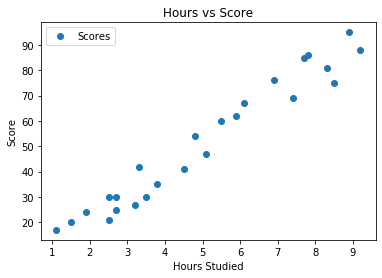

In [4]:
# Plotting the distribution of scores to find whether there is linear regression
data.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

In [5]:
#assigning the values
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

In [6]:
#spliting the data
from sklearn.model_selection import train_test_split    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=0)

In [7]:
print(X_train)
print("")
print(Y_train)

[[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]

[76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [8]:
print(X_test)
print("")
print(Y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]

[20 27 69 30 62 35 24 86]


In [9]:
#Training 
from sklearn.linear_model import LinearRegression    
regressor = LinearRegression()    
regressor.fit(X_train, Y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Score')

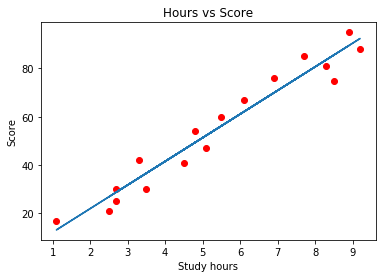

In [10]:
#plot training data
plt.scatter(X_train, Y_train, color ='red')
plt.plot(X_train, regressor.predict(X_train))
plt.title('Hours vs Score')
plt.xlabel("Study hours")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

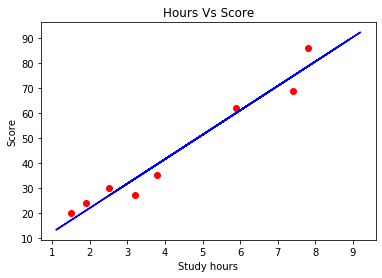

In [11]:
# Plotting test data
plt.scatter(X_test, Y_test, color ='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Hours Vs Score')
plt.xlabel("Study hours")
plt.ylabel("Score")


In [12]:
#Predicting test set
Y_predicted = regressor.predict(X_test)
print(Y_predicted)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [13]:
# Comparing Actual vs Predicted
compare = pd.DataFrame({'Actual': Y_test, 'Predicted':Y_predicted})  
compare.head() 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359


In [14]:
# testing own data
hours = [[9.25]]
own_predicted = regressor.predict(hours)
print("No. of hours studied = {}".format(hours))
print("Predicted Score = {}".format(own_predicted[0]))

No. of hours studied = [[9.25]]
Predicted Score = 92.91505723477056


In [15]:
#evaluate the model by find the mean absolute error
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted)) 

Mean Absolute Error: 4.4197278080276545
